# Transfer Learning using Fashion MNIST Dataset

In this notebook, I have tried to create a transfer learning model by using a pre-trained model. 

The dataset used here is the Fashion MNIST, which is an inbuilt dataset from Keras. 

In [1]:
#Reading the training images from the path and labelling them into the given categories
import pandas as pd

# this is an important module to get imported which may even cause issues while reading the data if not used
import cv2 

# for data visualization 
import seaborn as sns 
import tensorflow as tf
import keras

# Library for creating data paths
import os

# Library for randomly selecting data points
import random

# Library for performing numerical computations
import numpy as np

# Library for creating and showing plots
import matplotlib.pyplot as plt

# Library for reading and showing images
import matplotlib.image as mpimg

# Importing all the required sub-modules from Tensorflow Keras
from tensorflow.keras.models import Sequential, Model #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 

In [37]:
# Load data method loads the dataset into 2 tuples
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Count of the X_train and X_test
print("X train {} and Test size {}".format(X_train.shape[0], X_test.shape[0]))

X train 60000 and Test size 10000


<Axes: xlabel='label', ylabel='count'>

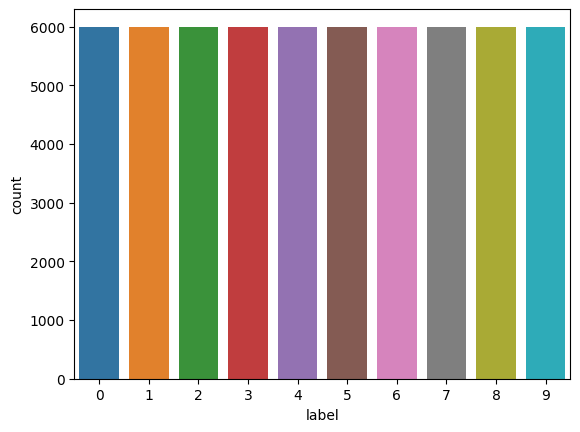

In [4]:
# Convert y_train to a pandas DataFrame and get the value counts
df = pd.DataFrame({'label': y_train})
value_counts = df['label'].value_counts()

# Plot the countplot using Seaborn
sns.countplot(x='label', data=df)

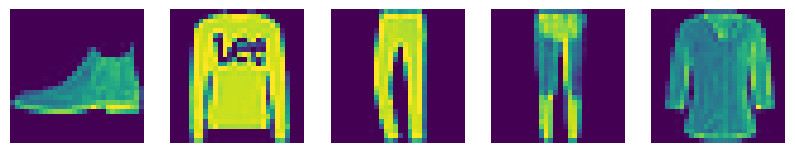

Label [9 2 1 1 6]


In [5]:
#plot the first five figures in the test dataset

plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
plt.show()

print('Label %s' % (y_test[0:5]))

In [38]:
# Convert to the tensor shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [39]:
print("X_Train shape {}".format(X_train.shape))
print("X_Test shape {}".format(X_test.shape))

X_Train shape (60000, 28, 28, 1)
X_Test shape (10000, 28, 28, 1)


In [40]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [41]:
#Converting Target variable to Categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Pre-Transfer Learning Models

A regular CNN model is built here with pooling and dropout layers. 
relu activation is used for the internal layers and softmax for the output layers.

In [42]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [44]:
# building the model
cnn_model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))
# Generating the summary of the model
cnn_model.summary()

    
    

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                125450    
                                                                 
Total params: 126,090
Trainable params: 126,090
Non-trainable params: 0
_________________________________________________________________


In [45]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.2371 - accuracy: 0.8526 - val_loss: 0.3661 - val_accuracy: 0.8766
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3058 - accuracy: 0.8917 - val_loss: 0.3769 - val_accuracy: 0.8784
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2827 - accuracy: 0.8993 - val_loss: 0.3772 - val_accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9039 - val_loss: 0.3649 - val_accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2532 - accuracy: 0.9088 - val_loss: 0.3792 - val_accuracy: 0.8826
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2421 - accuracy: 0.9122 - val_loss: 0.4163 - val_accuracy: 0.8772
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2296 - accuracy: 0.9152 - val_loss: 0.4491 - val_accuracy

In [47]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.8802


[0.49531733989715576, 0.8802000284194946]

In [48]:
def plot_train_instrumentation(epochs, data, train_param, val_param):
    
    plt.figure(figsize=(10,7))
    
    plt.plot(epochs, data[train_param], 'g', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'red', label=f'Validation ({val_param})')
    
    plt.title("Training performance")
    plt.xlabel('Epochs')
    plt.ylabel(train_param)
    
    plt.legend()
    plt.show()

In [49]:
history_dict = history.history

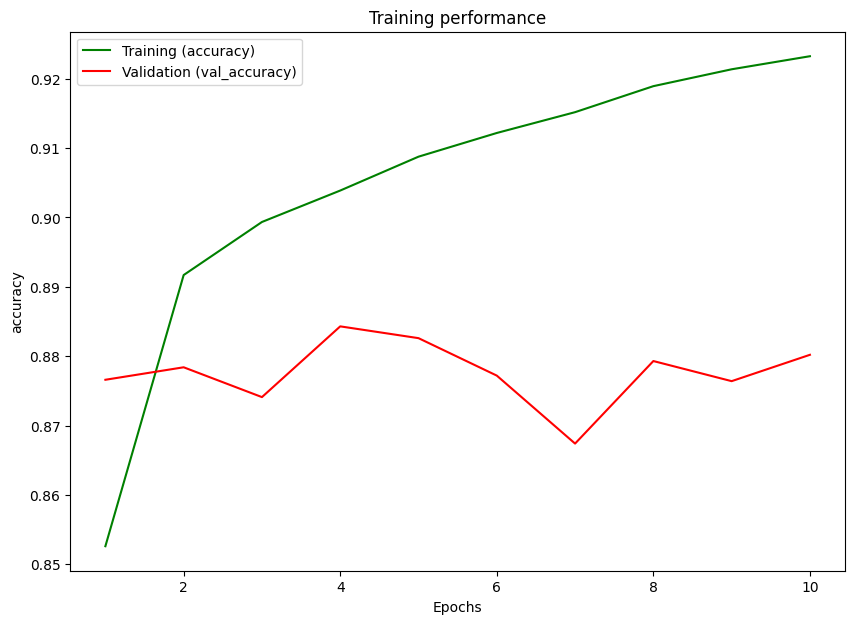

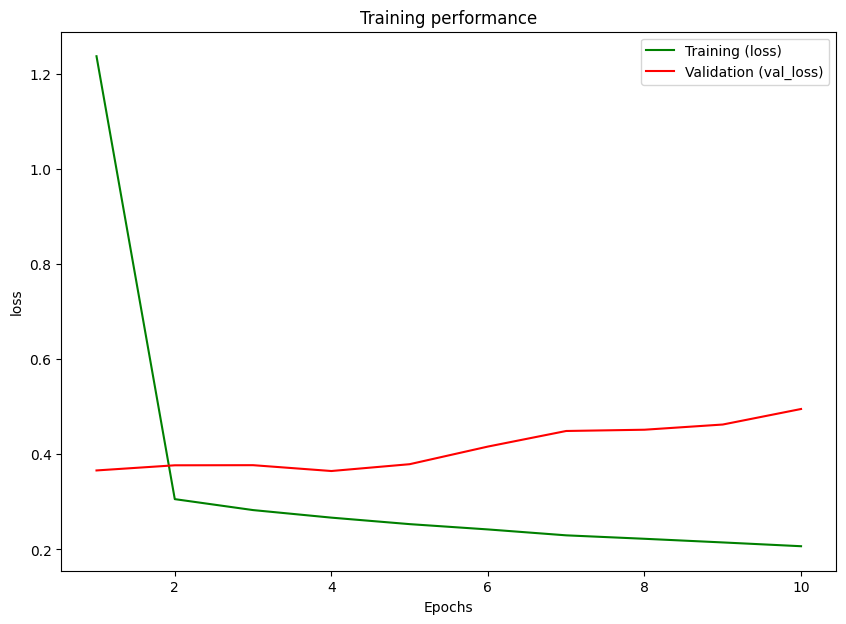

In [50]:
epochs = range(1, len(history_dict['accuracy'])+1)

plot_train_instrumentation(epochs, history_dict, 'accuracy', 'val_accuracy')
plot_train_instrumentation(epochs, history_dict, 'loss', 'val_loss')

**Creating a CNN with Batch Normalization and Dropouts**

In [52]:
#clearing the backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [53]:
conv_model = Sequential()
conv_model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
conv_model.add(BatchNormalization())
conv_model.add(Conv2D(32, kernel_size=3, activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Conv2D(32, kernel_size=5, strides=2, padding='same',  activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Dropout(0.4))
    ## Dropout Regularization of 0.4 in order to avoid overfitting
conv_model.add(Conv2D(64, kernel_size=3,  activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Conv2D(64, kernel_size=3,  activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Conv2D(64, kernel_size=5, strides=2, padding='same',  activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Dropout(0.4))
    
conv_model.add(Conv2D(64, kernel_size=4,  activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Flatten())
conv_model.add(Dropout(0.4))
conv_model.add(Dense(10, activation='softmax'))


In [54]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 13, 13, 32)       1

In [55]:
# Compile the model
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model with training set
history = conv_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 20s 10ms/step - loss: 0.5662 - accuracy: 0.7983 - val_loss: 0.3406 - val_accuracy: 0.8733
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3529 - accuracy: 0.8714 - val_loss: 0.2934 - val_accuracy: 0.8908
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3043 - accuracy: 0.8889 - val_loss: 0.2889 - val_accuracy: 0.8908
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2781 - accuracy: 0.8989 - val_loss: 0.2629 - val_accuracy: 0.9041
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2555 - accuracy: 0.9080 - val_loss: 0.2271 - val_accuracy: 0.9131
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2406 - accuracy: 0.9128 - val_loss: 0.2157 - val_accuracy: 0.9218
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2279 - accuracy: 0.9165 - val_loss: 0.2429 - val_

In [56]:
def plot_model_performance(model_history, metric, val_metric):
    plt.figure(figsize=(10,8))
    plt.plot(model_history.history[metric], label=str('Training '+ metric))
    plt.plot(model_history.history[val_metric], label=str('Validation '+ val_metric))
    plt.title(metric+" vs "+val_metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()
    plt.show()

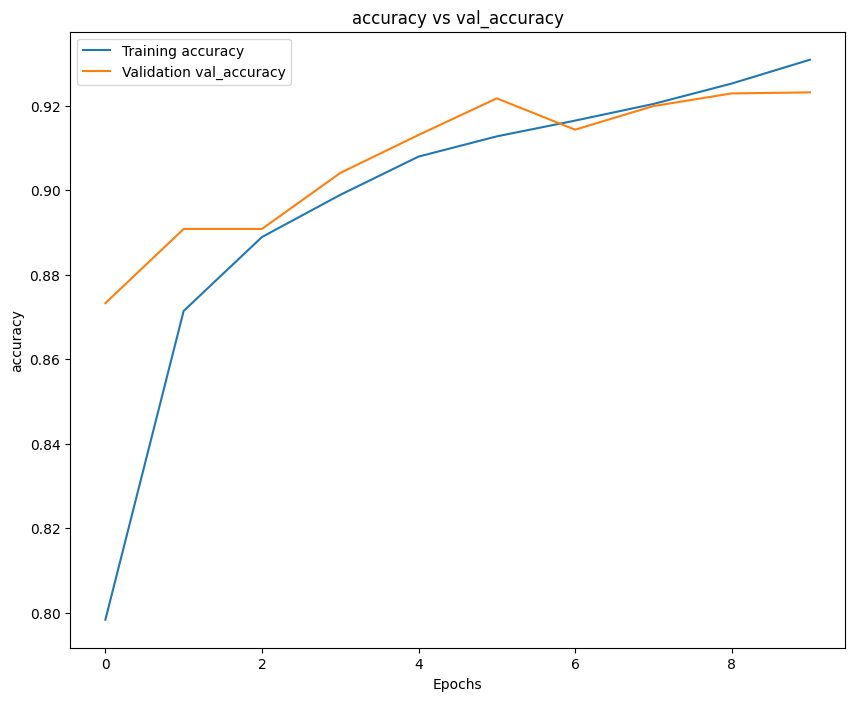

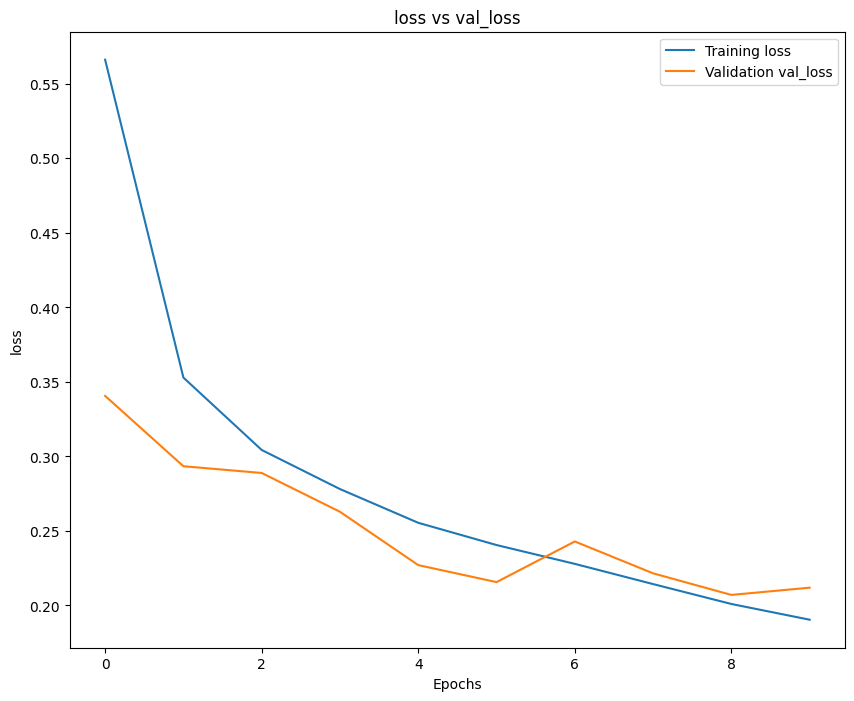

In [57]:
plot_model_performance(history, 'accuracy', 'val_accuracy')
plot_model_performance(history, 'loss', 'val_loss')

# Data Augmentation

In this particular code, I have done data augmentation by changing height, width, shearing etc only on the training data. However, if you need to an exercise like rescaling, then it will be done on both training and test datasets. The complete code will look like this:

train_data_augmentor = ImageDataGenerator(rescale=1. / 255.0, 
                              horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)

test_data_augmentor = ImageDataGenerator(rescale=1. / 255.0)

train_data_augmentor.fit(X_train)

test_data_augmentor.fit(X_test) 

train_augment = train_data_augmentor.flow(X_train, batch_size=1)

test_augment = test_data_augmentor.flow(X_test, batch_size=1) 

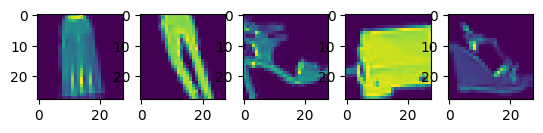

In [58]:
# Create data augmentation object
train_data_augmentor = ImageDataGenerator(#rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)

#test data augmentation is only normalization 
#test_data_augmentor = ImageDataGenerator(rescale=1. / 255.0)

# fit the training data
train_data_augmentor.fit(X_train)
#test_data_augmentor.fit(X_test) 
train_augment = train_data_augmentor.flow(X_train, batch_size=1)
#test_augment = test_data_augmentor.flow(X_test, batch_size=1) 

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(train_augment.next().squeeze())
plt.show()

#for i in range(1, 6):
   # plt.subplot(1,5,i)
   # plt.imshow(test_augment.next().squeeze())
#plt.show()

In [59]:
transfer_layer = conv_model.get_layer('batch_normalization_6') 
transfer_model = Model(inputs=conv_model.input, outputs=transfer_layer.output)
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        25632 

In [61]:
# Making all the layers of the convolution model non-trainable. i.e. freezing them
for layer in transfer_model.layers:
    layer.trainable = False

for layer in transfer_model.layers:
    print(layer.name, layer.trainable)

conv2d_input False
conv2d False
batch_normalization False
conv2d_1 False
batch_normalization_1 False
conv2d_2 False
batch_normalization_2 False
dropout False
conv2d_3 False
batch_normalization_3 False
conv2d_4 False
batch_normalization_4 False
conv2d_5 False
batch_normalization_5 False
dropout_1 False
conv2d_6 False
batch_normalization_6 False


In [62]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(transfer_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(10, activation='softmax'))

In [63]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2, 2, 64)          269760    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 279,370
Trainable params: 9,610
Non-trainable params: 269,760
_________________________________________________________________


In [64]:
## Fitting the Transfer model
new_model_history = new_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2248 - accuracy: 0.9229 - val_loss: 0.2174 - val_accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1735 - accuracy: 0.9363 - val_loss: 0.2106 - val_accuracy: 0.9272
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1708 - accuracy: 0.9377 - val_loss: 0.2080 - val_accuracy: 0.9290
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1659 - accuracy: 0.9377 - val_loss: 0.2081 - val_accuracy: 0.9276
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1654 - accuracy: 0.9393 - val_loss: 0.2031 - val_accuracy: 0.9296


In [65]:
# Evaluating on the Test set
new_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2031 - accuracy: 0.9296


[0.20306268334388733, 0.9296000003814697]

In [66]:
# Function to plot loss, val_loss, 
def plot_history(history,title):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title(title)
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

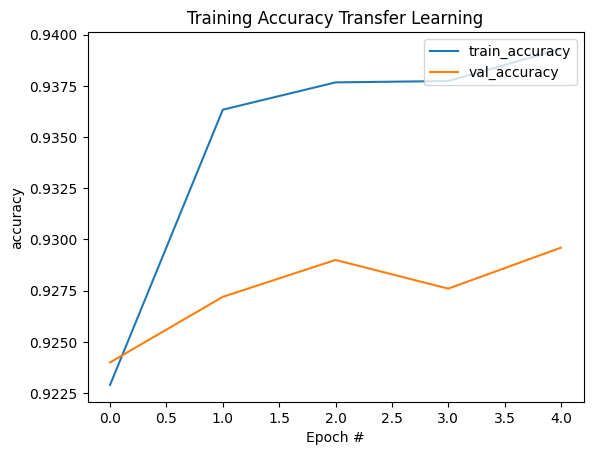

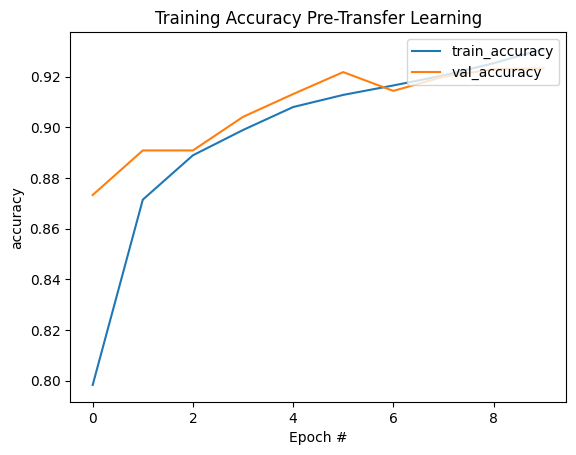

In [67]:
# Plotting the loss vs epoch curve for the basic CNN model without Transfer Learning
plot_history(new_model_history, "Training Accuracy Transfer Learning")

plot_history(history, "Training Accuracy Pre-Transfer Learning")